In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import os
import env
import acquire as a
import prepare as p
import wrangle as w
from sklearn.model_selection import train_test_split

#Stats imports
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind, chi2_contingency


#visual imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.get_zillow()

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclasstypeid.1,buildingclassdesc,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc
0,0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,269,Planned Unit Development,NaN,NaN,NaN,NaN
1,1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,261,Single Family Residential,NaN,NaN,NaN,NaN
2,2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,...,5.0,Specialized buildings that do not fit in any of the above categories,NaN,NaN,47,Store/Office (Mixed Use),NaN,NaN,NaN,NaN
3,3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,...,3.0,"Buildings having exterior walls built of a non-combustible material such as brick, con...",NaN,NaN,47,Store/Office (Mixed Use),NaN,NaN,NaN,NaN
4,4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,...,4.0,Buildings having wood or wood and steel frames,NaN,NaN,31,Commercial/Office/Residential Mixed Used,NaN,NaN,NaN,NaN


In [4]:
df.shape

(77613, 76)

In [5]:
# Drop id columns that are causing duplicate columns
df.drop(['parcelid','propertylandusetypeid','heatingorsystemtypeid','architecturalstyletypeid','\
airconditioningtypeid','typeconstructiontypeid','storytypeid','buildingclasstypeid'], axis=1, inplace=True)


In [6]:
df.shape

(77613, 68)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77613 non-null  int64  
 1   basementsqft                  45 non-null     float64
 2   bathroomcnt                   77613 non-null  float64
 3   bedroomcnt                    77613 non-null  float64
 4   buildingqualitytypeid         50321 non-null  float64
 5   calculatedbathnbr             74390 non-null  float64
 6   decktypeid                    513 non-null    float64
 7   finishedfloor1squarefeet      5973 non-null   float64
 8   calculatedfinishedsquarefeet  76501 non-null  float64
 9   finishedsquarefeet12          70963 non-null  float64
 10  finishedsquarefeet13          235 non-null    float64
 11  finishedsquarefeet15          4758 non-null   float64
 12  finishedsquarefeet50          5973 non-null   float64
 13  f

# Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?



1. Is logerror significantly different depending in the county?
2. is logerror significantly different  depending on zip codes?
3. Is there a signficant relation between logerror and year built?
4. Is there a significant relation between logerror and lot size?
5. Is there a significant relation between logerror and square feet?



# Answer those questions through a mix of statistical tests and visualizations.



In [8]:
df =w.handle_missing_values(df, .1)
df.head()

,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,censustractandblock,parcelid.1,logerror,transactiondate,airconditioningtypeid.1,airconditioningdesc,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc
0,0,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,NaN,14297519,0.025595,2017-01-01,NaN,NaN,NaN,NaN,269,Planned Unit Development
1,1,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,NaN,17052889,0.055619,2017-01-01,NaN,NaN,NaN,NaN,261,Single Family Residential
2,2,0.0,0.0,NaN,NaN,73026.0,NaN,6037.0,NaN,NaN,...,NaN,14186244,0.005383,2017-01-01,NaN,NaN,NaN,NaN,47,Store/Office (Mixed Use)
3,3,0.0,0.0,6.0,NaN,5068.0,NaN,6037.0,NaN,NaN,...,NaN,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,NaN,47,Store/Office (Mixed Use)
4,4,0.0,0.0,NaN,NaN,1776.0,NaN,6037.0,NaN,NaN,...,NaN,10887214,0.006940,2017-01-01,NaN,NaN,NaN,NaN,31,Commercial/Office/Residential Mixed Used


##  Pearson R Logerror and County(fips)

<AxesSubplot:xlabel='logerror', ylabel='Count'>

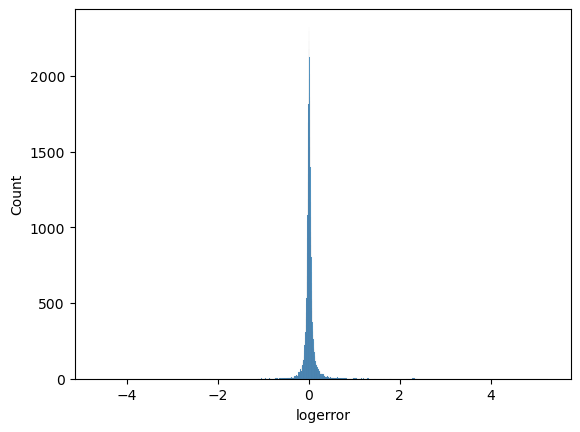

In [13]:
sns.histplot(x='logerror', data=df)

In [14]:
stats.pearsonr(df.logerror, df.fips)

PearsonRResult(statistic=0.001783854347402994, pvalue=0.6192184344012265)

## Spearman R Logerror and sq ft


In [16]:
stats.spearmanr(df.logerror, df.calculatedfinishedsquarefeet)

SpearmanrResult(correlation=nan, pvalue=nan)